# Risky Business

Harold has been boasting about his recent cryptocurrency returns. He's even bet you five bucks that his trading algorithm has made his returns better than yours. Calculate the standard deviation and sharpe ratio for each your portfolios to determine which portfolio is the better investment based off of the greatest risk to reward ratio.

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline


### Read in data

In [2]:
harold_portfolio_path = Path("../../Resources/harold_portfolio.csv")
my_portfolio_path = Path("../../Resources/my_portfolio.csv")

# Read in data
harold_portfolio = pd.read_csv(harold_portfolio_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
my_portfolio = pd.read_csv(my_portfolio_path,index_col='Date', parse_dates=True, infer_datetime_format=True)




# Drop na
harolds=harold_portfolio.dropna()
mine=my_portfolio.dropna()

# Set Date as index


harolds.info()
print(harolds)
mine.info()
print(mine)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2019-05-20 to 2019-05-15
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     6 non-null      float64
 1   BTT     6 non-null      float64
 2   DOGE    6 non-null      float64
 3   ETH     6 non-null      float64
 4   LTC     6 non-null      float64
 5   XRP     6 non-null      float64
 6   SOLVE   6 non-null      float64
 7   XLM     6 non-null      float64
 8   TRON    6 non-null      float64
 9   ZIL     6 non-null      float64
dtypes: float64(10)
memory usage: 528.0 bytes
                BTC       BTT      DOGE     ETH     LTC       XRP     SOLVE  \
Date                                                                          
2019-05-20  8118.39  0.001187  0.003041  261.09   95.06  0.398003  0.338667   
2019-05-19  8200.00  0.001056  0.003178  234.03   86.65  0.417700  0.300430   
2019-05-18  7262.40  0.000993  0.003005  244.59   89.88  0.372736  0.287

### Calculate daily returns 

In [3]:
# Calculate daily returns for each portfolio
harolds_daily_returns=harolds.pct_change().dropna()
my_daily_returns=mine.pct_change().dropna()

harolds_daily_returns= harolds_daily_returns#.sort_index(ascending=True)
my_daily_returns= my_daily_returns#.sort_index(ascending=True)
#print(harolds_daily_returns.tail())
#print(harolds_daily_returns.head())



In [4]:
#combined_portfolios= pd.concat([harolds, mine], axis='columns', join='outer')
combined_daily_returns= pd.concat([harolds_daily_returns,my_daily_returns], axis='columns', join='inner')
combined_daily_returns.sort_index(ascending=True)
combined_daily_returns

,BTC,BTT,DOGE,ETH,LTC,XRP,SOLVE,XLM,TRON,ZIL,BTC,DOGE,ETH,LTC,XRP,XLM
Date,,,,,,,,,,,,,,,,
2019-05-19,0.010052,-0.110362,0.045051,-0.103642,-0.088470,0.049490,-0.112904,0.043823,0.026939,0.065474,-0.114341,0.045051,-0.103642,-0.088470,0.049490,0.043823
2019-05-18,-0.114341,-0.059659,-0.054437,0.045122,0.037276,-0.107647,-0.042606,-0.089423,-0.083820,-0.077465,0.013947,-0.054437,0.045122,0.037276,-0.107647,-0.089423
2019-05-17,0.013947,-0.036254,-0.014309,0.080952,0.065309,0.036103,-0.097778,-0.017627,0.014801,0.011705,0.069974,-0.014309,0.080952,0.065309,0.036103,-0.017627
2019-05-16,0.069974,-0.075235,0.069548,-0.058209,0.067990,0.086780,-0.139457,0.084709,0.060140,0.046557,0.041168,0.069548,-0.058209,0.067990,0.086780,0.084709
2019-05-15,0.041168,-0.037288,0.044192,-0.126747,-0.103364,0.086484,0.007420,-0.002047,0.086322,0.088224,-0.025892,0.044192,-0.126747,-0.103364,0.086484,-0.002047


In [5]:
daily_stds=combined_daily_returns.std()
daily_stds=daily_stds.sort_values(ascending=False)
daily_stds

ETH      0.091517
ETH      0.091517
LTC      0.084703
LTC      0.084703
XRP      0.080277
XRP      0.080277
BTC      0.071562
BTC      0.070488
XLM      0.065825
XLM      0.065825
TRON     0.064923
ZIL      0.064726
SOLVE    0.059016
DOGE     0.050907
DOGE     0.050907
BTT      0.030731
dtype: float64

In [6]:
yearlystds = daily_stds*np.sqrt(252)
### Calculate `sharpe ratio` for all data


In [7]:
sharpe_ratios=(combined_daily_returns.mean()*252)/(combined_daily_returns.std()*np.sqrt(252))


In [8]:
# Calculate sharpe ratio
sharpe_ratios

BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
BTC      -0.671876
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
XLM       0.937406
dtype: float64

### Plot Sharpe Ratios

<AxesSubplot:title={'center':'Sharpe_Ratios'}>

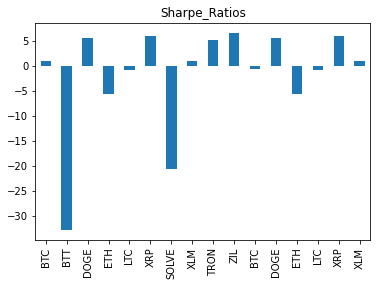

In [9]:
# Plot
sharpe_ratios.plot(kind='bar', title='Sharpe_Ratios')



### How many smart investments did Harold make compared to risky investments? How many did you make?

*Your answer here:*


### Which cryptos have been the smartest investment?

*Your answer here:*

### Calculate annualized std dev for each portfolio individually

In [14]:
# Calculate std dev for all investments for each portfolio
harolds_daily_std=harolds_daily_returns.std()
harolds_yearly_std=harolds_daily_std*np.sqrt(252)
my_daily_std=my_daily_returns.std()
my_yearly_std=my_daily_std*np.sqrt(252)
harolds_yearly_std
print(my_yearly_std)


BTC     0.672712
DOGE    1.118621
ETH     0.937257
LTC     0.995635
XRP     1.229463
XLM     1.336267
dtype: float64


### Calculate the sharpe ratios for each individual portfolio

In [15]:
# Calculate sharpe ratio
harolds_sharpe=(harolds_daily_returns.mean()*252)/(harolds_daily_returns.std()*np.sqrt(252))
my_sharpe=(my_daily_returns.mean()*252)/(my_daily_returns.std()*np.sqrt(252))
print(my_sharpe)
print(harolds_sharpe)

BTC    -0.666636
DOGE   -0.020114
ETH    -0.389330
LTC    -0.285959
XRP    -0.212338
XLM    -0.092516
dtype: float64
BTC       0.936891
BTT     -32.935733
DOGE      5.615811
ETH      -5.638309
LTC      -0.796855
XRP       5.980254
SOLVE   -20.729548
XLM       0.937406
TRON      5.104548
ZIL       6.597156
dtype: float64


### Average sharpe ratios for each portfolio and output to screen

In [16]:
# Averaging sharpe ratios
print(my_sharpe.mean())
print(harolds_sharpe.mean())

-0.27781543864562924
-3.4928380351166615


### Compare Sharpe Ratios Averages

In [18]:
# Use comparison operator to determine if Harold's sharpe ratio avg is greater
if my_sharpe.mean() > harolds_sharpe.mean():
    x = my_sharpe.mean()
    print(f"It's time to go flex on Harold")

else:
    print("Do not pass go, do not collect $100")


It's time to go flex on Harold


-7.819064492771292

### Which portfolio is the smartest investment, based off of risk to reward ratio?

*Your answer here:*